In [1]:
from collections import Counter
from math import sqrt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt

In [2]:
def gerb(size, eps):
    uni = sps.uniform(0.5, 1)
    sample = uni.rvs(size)
    sample = np.floor(sample)
    counts = Counter(sample)
    print("Для {:d} гербов:".format(size))
    print("Количество гербов: {:d}".format(counts[1]))
    print("Частота выпадения герба: {:f}".format(counts[1] / size))
    print("|{:f} - 0.5| = {:f} < {:.2f}".format(counts[1] / size, abs(counts[1] / size - 0.5), eps))

gerb(170, 0.1)
print()
gerb(1850, 0.03)

Для 170 гербов:
Количество гербов: 79
Частота выпадения герба: 0.464706
|0.464706 - 0.5| = 0.035294 < 0.10

Для 1850 гербов:
Количество гербов: 909
Частота выпадения герба: 0.491351
|0.491351 - 0.5| = 0.008649 < 0.03


In [3]:
def zbch(eps):
    expon = sps.expon(0, 1)
    n = int(np.ceil(5.4 * 1 / (eps * eps)))
    arr = expon.rvs(n)
    m = np.mean(arr)
    print("Для {:d} вариантов:".format(n))
    print("|{:f} - 1| = {:f} < {:.2f}".format(m, abs(m - 1), eps))

zbch(0.2)
print()
zbch(0.05)

Для 135 вариантов:
|1.066475 - 1| = 0.066475 < 0.20

Для 2160 вариантов:
|1.000110 - 1| = 0.000110 < 0.05


Средние значения 7 выборок по 1000 элементов:
[ 8.11279064e-01 -3.22069303e-01 -2.49701009e+00 -4.36730374e-01
  8.42116993e-03  2.74802809e+00 -1.21030687e+01]
Общее среднее из 7 выборок по 1000 элементов: -1.684450


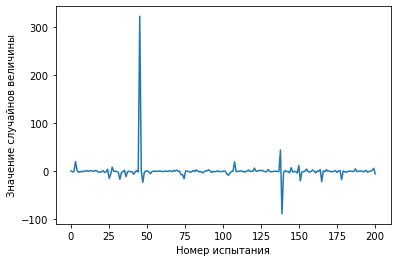

In [4]:
def not_zbch():
    cauchy = sps.cauchy()
    sample_size = 1000
    size = 7
    samples = []
    means = np.array([])
    for i in range(size):
        samples.append(cauchy.rvs(sample_size))
        means = np.append(means, np.mean(samples[i]))
    print("Средние значения 7 выборок по 1000 элементов:")
    print(means)
    print("Общее среднее из 7 выборок по 1000 элементов: {:f}".format(np.mean(means)))
    
    size = 200
    sample = cauchy.rvs(size)
    X = np.linspace(0, size, size)
    plt.plot(X, sample)
    plt.xlabel("Номер испытания")
    plt.ylabel("Значение случайнов величины")

    
not_zbch()

Средние значения из 20 выборок по 10:
[0.47106225 0.45066032 0.52664761 0.50796885 0.46561394 0.48855939
 0.70751007 0.47112838 0.46499829 0.6935881  0.63313452 0.50446155
 0.5740047  0.5495766  0.50583768 0.62112521 0.52258816 0.44448578
 0.55960828 0.56476927]
Среднеквадратичное отклонение от выборочного среднего: 0.077197
Минимальное среднее: 0.444486
Максимальное среднее: 0.707510

Средние значения из 20 выборок по 40:
[0.45328117 0.45418678 0.51277833 0.39200258 0.50381968 0.49213966
 0.5261553  0.45948709 0.52426163 0.44564132 0.5168949  0.57450589
 0.4744965  0.46181426 0.43016982 0.4639982  0.48438365 0.55123484
 0.41752802 0.51145882]
Среднеквадратичное отклонение от выборочного среднего: 0.045801
Минимальное среднее: 0.392003
Максимальное среднее: 0.574506

Средние значения из 20 выборок по 160:
[0.51088936 0.4736602  0.51518837 0.49746148 0.49651423 0.52100005
 0.51134592 0.43070366 0.49340839 0.52214127 0.49848971 0.51115337
 0.45398059 0.52405277 0.48765727 0.50379468 0.51

Text(0, 0.5, 'Количество элементов в выборке')

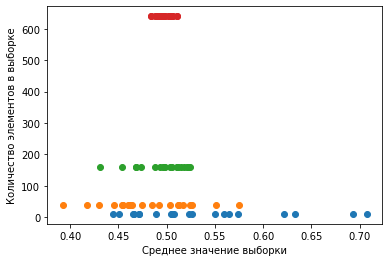

In [5]:
def deviation(sample_size):
    uni = sps.uniform(0, 1)
    size = 20
    samples = []
    means = np.zeros(size)
    for i in range(size):
        samples.append(uni.rvs(sample_size))
        means[i] = np.mean(samples[i])
    print("Средние значения из {:d} выборок по {:d}:".format(size, sample_size))
    print(means)
    std_dev = sps.tstd(means)
    print("Среднеквадратичное отклонение от выборочного среднего: {:f}".format(std_dev))
    print("Минимальное среднее: {:f}".format(min(means)))
    print("Максимальное среднее: {:f}".format(max(means)))
    print()
    Y = np.full((size), sample_size)
    plt.plot(means, Y, 'o')
    

deviation(10)
deviation(40)
deviation(160)
deviation(640)
plt.xlabel("Среднее значение выборки")
plt.ylabel("Количество элементов в выборке")

Text(0, 0.5, 'Средняя вероятность выпадения герба')

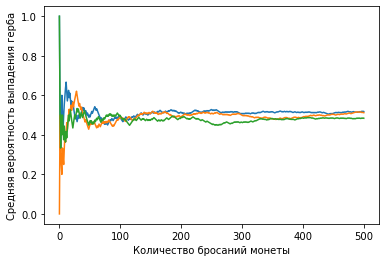

In [6]:
def borel():
    sample_size = 500
    vars = [0, 1]
    sample = np.random.choice(vars, sample_size)
    freq = np.zeros((sample_size))
    freq[0] = sample[0]
    for i in range(1, sample_size):
        freq[i] = (i * freq[i - 1] + sample[i]) / float(i + 1)
    X = np.linspace(0, sample_size, sample_size)
    plt.plot(X, freq)
    
borel()
borel()
borel()
plt.xlabel("Количество бросаний монеты")
plt.ylabel("Средняя вероятность выпадения герба")

In [7]:
def not_borel(pdf_param):
    sample_size = 500
    vars = [-1, 1]
    signs = np.random.choice(vars, sample_size)
    uni = sps.uniform(0, 1)
    uniformed = uni.rvs(sample_size)
    sample = []
    for i in range(sample_size):
        sample.append((uniformed[i] ** (-pdf_param) - 1) * signs[i])
        
    freq = np.zeros((sample_size))
    freq[0] = sample[0]
    for i in range(1, sample_size):
        freq[i] = (i * freq[i - 1] + sample[i]) / float(i + 1)
    X = np.linspace(0, sample_size, sample_size)
    plt.plot(X, freq)
    
    
def not_borel3(pdf_param):
    size = 3
    for i in range(size):
        not_borel(pdf_param)
    plt.xlabel("Количество испытаний")
    plt.ylabel("Среднее значение случайной величины")

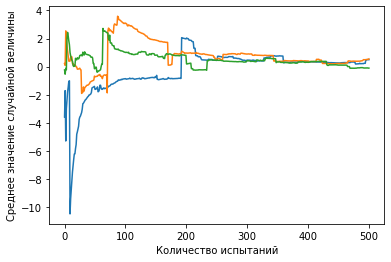

In [8]:
not_borel3(1)

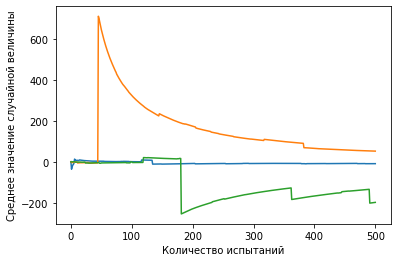

In [9]:
not_borel3(1.5)

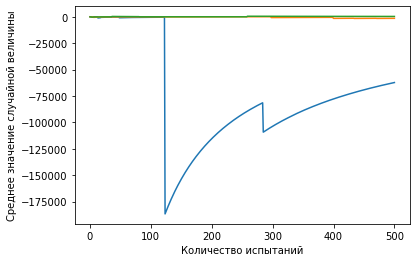

In [10]:
not_borel3(2)

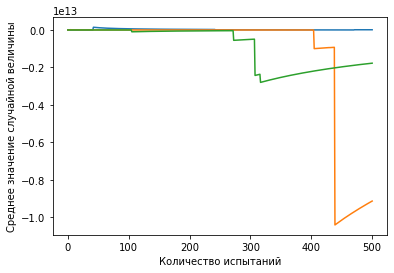

In [11]:
not_borel3(5)

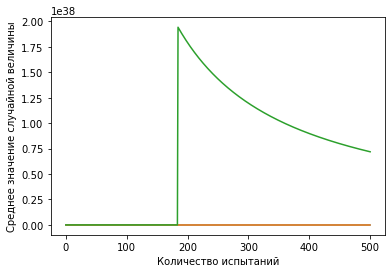

In [12]:
not_borel3(10)

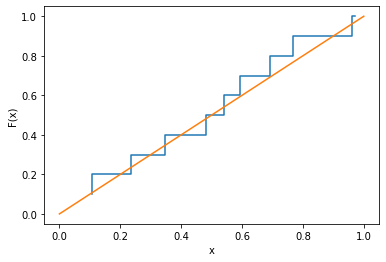

In [13]:
def glivenko(sample_size):
    uni = sps.uniform(0, 1)
    sample = uni.rvs(sample_size)
    sample = sorted(sample)
    cdf = [1.0 / sample_size]
    for i in range(1, sample_size):
        cdf.append(cdf[i - 1] + 1.0 / sample_size)
    X = np.linspace(0, 1, 100)
    theor_cdf = uni.cdf(X)
    
    plt.step(sample, cdf)
    plt.plot(X, theor_cdf)
    plt.xlabel("x")
    plt.ylabel("F(x)")
    

glivenko(10)

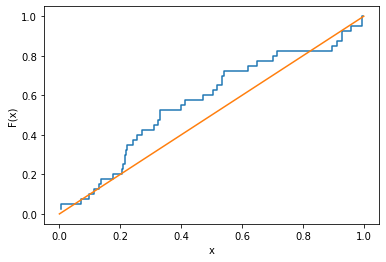

In [14]:
glivenko(40)

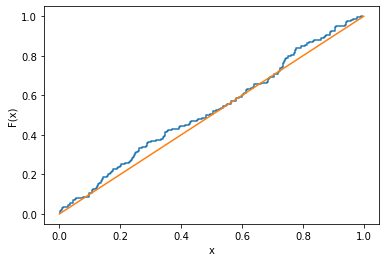

In [15]:
glivenko(160)

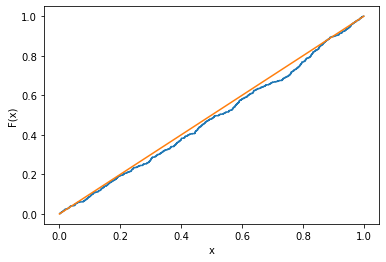

In [16]:
glivenko(640)

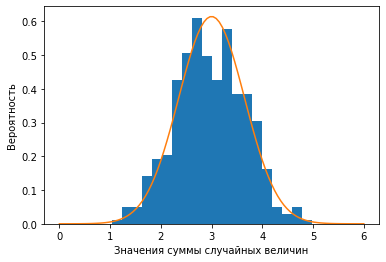

In [17]:
def clt(sample_size, create_random_variable, theor_pdf, interval):
    sample = []
    for i in range(sample_size):
        sample.append(create_random_variable())
    X = np.linspace(interval[0], interval[1], 100)
    Y = []
    for i in range(len(X)):
        Y.append(theor_pdf(X[i]))
    plt.hist(sample, bins=20, density=True)
    plt.plot(X, Y)
    plt.xlabel("Значения суммы случайных величин")
    plt.ylabel("Вероятность")


def create_mixed_variable():
    value = sps.beta.rvs(1, 0.5, size=1)[0]
    value += sps.beta.rvs(0.5, 1, size=1)[0]
    value += sps.beta.rvs(1, 1, size=1)[0]
    value += sps.beta.rvs(1, 2, size=1)[0]
    value += sps.beta.rvs(2, 1, size=1)[0]
    value += sps.beta.rvs(2, 2, size=1)[0]
    return value


def beta_expected_value(a, b):
    return a / (a + b)


def beta_dispersion(a, b):
    return a * b / ((a + b) * (a + b) * (a + b + 1))


expected_value = beta_expected_value(1, 0.5) + \
    beta_expected_value(0.5, 1) + beta_expected_value(1, 1) + \
    beta_expected_value(1, 2) + beta_expected_value(2, 1) + \
    beta_expected_value(2, 2)
dispersion = beta_dispersion(1, 0.5) + \
    beta_dispersion(0.5, 1) + beta_dispersion(1, 1) + \
    beta_dispersion(1, 2) + beta_dispersion(2, 1) + \
    beta_dispersion(2, 2)

def theor_pdf(x):
    return sps.norm.pdf(x, loc=expected_value, scale=sqrt(dispersion))

        
clt(500, create_mixed_variable, theor_pdf, (0, 6))

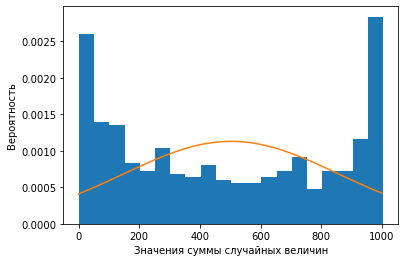

In [18]:
def create_bad_mixed_variable():
    return create_mixed_variable() + 1000 * sps.beta.rvs(0.5, 0.5, size=1)[0]


bad_expected_value = expected_value + 1000 * beta_expected_value(0.5, 0.5)
bad_dispersion = dispersion + 1000000 * beta_dispersion(0.5, 0.5)

def bad_theor_pdf(x):
    return sps.norm.pdf(x, loc=bad_expected_value, scale=sqrt(bad_dispersion))


clt(500, create_bad_mixed_variable, bad_theor_pdf, (0, 1000))
